# SUPERVISED LEARNING
In this scenario, I’m running a website that generates revenue based on visitor traffic. With numerous article submissions from amateur writers, I need to curate which ones to publish to maximize site traffic and revenue. Although relying on intuition could help judge potential visitor interest, this would be time-consuming and likely imprecise. Instead, a supervised learning approach could analyze article content and predict the number of visitors each might attract, automating the selection process. This automated system could prioritize articles with higher expected revenue, optimizing both time and income.

In [6]:
#Reading and Plotting News Article Data
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
news=pd.read_csv('/content/drive/My Drive/OnlineNewsPopularity.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


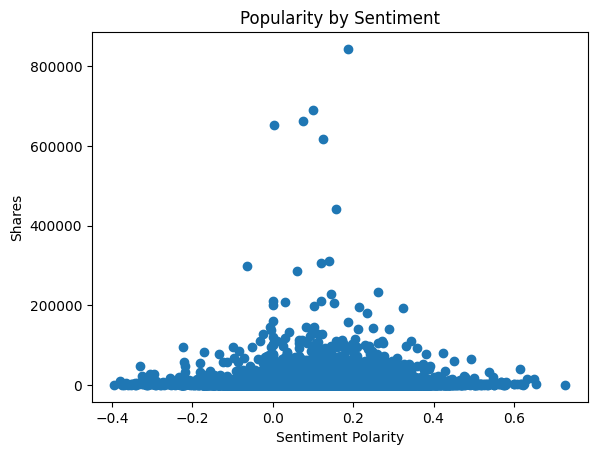

In [7]:
from matplotlib import pyplot as plt
plt.scatter(news[' global_sentiment_polarity'],news[' shares'])
plt.title('Popularity by Sentiment')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Shares')
plt.show()

In [8]:
#Using Linear Regression as a Prediction Method
from sklearn.linear_model import LinearRegression
x = news[' global_sentiment_polarity'].values.reshape(-1,1)
y = news[' shares'].values.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(x, y)
print(regressor.coef_)
print(regressor.intercept_)

[[499.34840588]]
[3335.80329021]


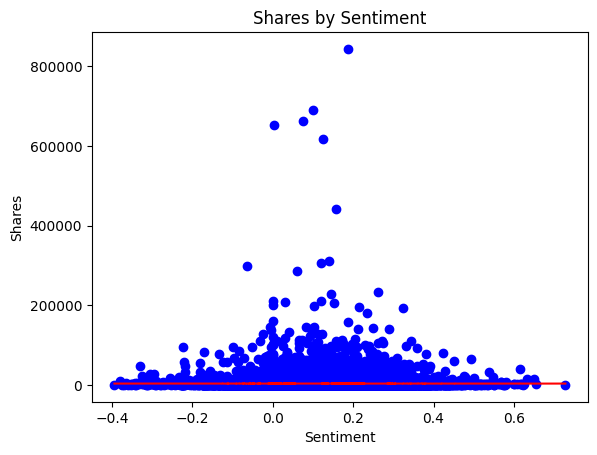

In [9]:
regline=regressor.predict(x)
plt.scatter(news[' global_sentiment_polarity'],news[' shares'],color='blue')
plt.plot(sorted(news[' global_sentiment_polarity'].tolist()),regline,'r')
plt.title('Shares by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Shares')
plt.show()

In [10]:
#k-Nearest Neighbors
#Implementing k-NN
k=15
newsentiment=0.5

In [11]:
allsentiment=news[' global_sentiment_polarity'].tolist()
allshares=news[' shares'].tolist()

In [12]:
distances=[abs(x-newsentiment) for x in allsentiment]

In [15]:
import numpy as np
idx = np.argsort(distances)
print(idx[0:k]),

[30230 22546  7284 13035 29598 19361 36029 30670 25556  6744 26473  7211
  9200 15198 31496]


(None,)

In [16]:
nearbyshares=[allshares[i] for i in idx[0:k]]

In [17]:
print(np.mean(nearbyshares))

7344.466666666666


In [18]:
#Performing k-NN with Python’s sklearn
from sklearn.neighbors import KNeighborsRegressor

In [19]:
x=np.array(allsentiment).reshape(-1,1)
y=np.array(allshares)

In [20]:
knnregressor = KNeighborsRegressor(n_neighbors=15)
knnregressor.fit(x,y)

KNeighborsRegressor(n_neighbors=15)

In [21]:
print(knnregressor.predict(np.array([newsentiment]).reshape(1,-1)))

[7344.46666667]


In [22]:
#Using Other Supervised Learning Algorithms
#linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(np.array(allsentiment).reshape(-1,1), np.array(allshares))
print(regressor.predict(np.array([newsentiment]).reshape(1,-1)))

[3585.47749315]


In [23]:
#knn
from sklearn.neighbors import KNeighborsRegressor
knnregressor = KNeighborsRegressor(n_neighbors=15)
knnregressor.fit(np.array(allsentiment).reshape(-1,1), np.array(allshares))
print(knnregressor.predict(np.array([newsentiment]).reshape(1,-1)))

[7344.46666667]


In [24]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
dtregressor = DecisionTreeRegressor(max_depth=3)
dtregressor.fit(np.array(allsentiment).reshape(-1,1), np.array(allshares))
print(dtregressor.predict(np.array([newsentiment]).reshape(1,-1)))

[3978.70776621]


In [25]:
#random forest
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor()
rfregressor.fit(np.array(allsentiment).reshape(-1,1), np.array(allshares))
print(rfregressor.predict(np.array([newsentiment]).reshape(1,-1)))

[4738.59760534]


In [26]:
#neural network
from sklearn.neural_network import MLPRegressor
nnregressor = MLPRegressor()
nnregressor.fit(np.array(allsentiment).reshape(-1,1), np.array(allshares))
print(nnregressor.predict(np.array([newsentiment]).reshape(1,-1)))

[3953.52009783]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


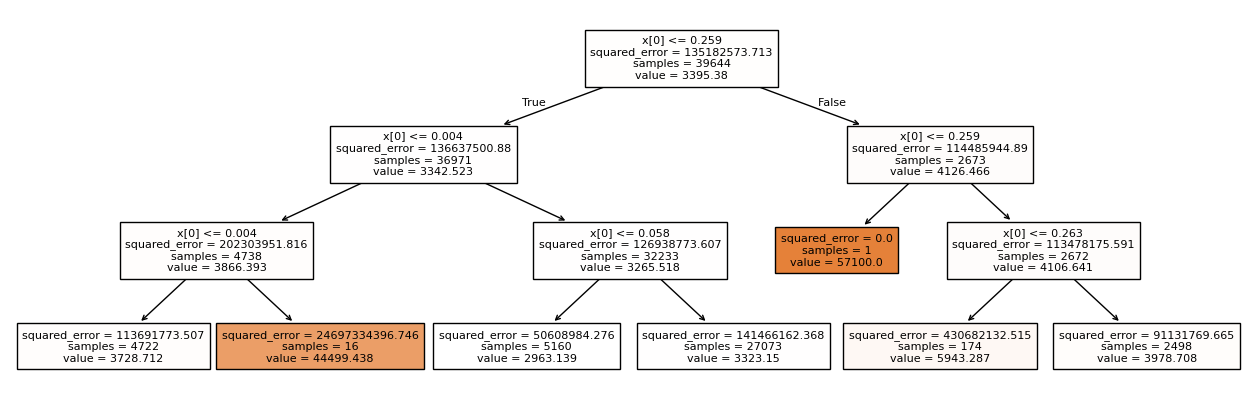

In [27]:
#Decision Trees
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
plot_tree(dtregressor, filled=True, fontsize=8)
plt.savefig('decisiontree.png')

In [28]:
#Measuring Prediction Accuracy
allprediction=regressor.predict(np.array([allsentiment]).reshape(-1,1))
predictionerror=abs(allprediction-allsentiment)
print(np.mean(predictionerror))

3395.26087436506


In [29]:
from sklearn.model_selection import train_test_split
x=np.array([allsentiment]).reshape(-1,1)
y=np.array(allshares)
trainingx,testx,trainingy,testy=train_test_split(x,y,random_state=1)

In [30]:
print(len(trainingx))
print(len(trainingy))
print(len(testx))
print(len(testy))

29733
29733
9911
9911


In [31]:
rfregressor = RandomForestRegressor(random_state=1)
rfregressor.fit(trainingx, trainingy)
predicted = rfregressor.predict(testx)
predictionerror = abs(predicted-testy)

In [32]:
knnregressor = KNeighborsRegressor(n_neighbors=15)
knnregressor.fit(trainingx, trainingy)
predicted = knnregressor.predict(testx)
predictionerror = abs(predicted-testy)

In [35]:
#Working with Multivariate Models
x=news[[' global_sentiment_polarity',' n_unique_tokens',' n_non_stop_words']]
y=np.array(allshares)
trainingx,testx,trainingy,testy=train_test_split(x,y,random_state=1)
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(random_state=1)
rfregressor.fit(trainingx, trainingy)
predicted = rfregressor.predict(testx)
predictionerror = abs(predicted-testy)
print(np.mean(predictionerror))

3474.431322312199


In [36]:
#Using Classification Instead of Regression
themedian=np.median(news[' shares'])
news['abovemedianshares']=1*(news[' shares']>themedian)

In [37]:
x=news[[' global_sentiment_polarity',' n_unique_tokens',' n_non_stop_words']]
y=np.array(news['abovemedianshares'])
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors=15)
trainingx,testx,trainingy,testy=train_test_split(x,y,random_state=1)
knnclassifier.fit(trainingx, trainingy)
predicted = knnclassifier.predict(testx)

In [38]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(testy,predicted))

[[2703 2280]
 [2370 2558]]


In [40]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(testy,predicted)
recall = recall_score(testy,predicted)
print(precision)
print(recall)

0.5287308805291443
0.5190746753246753


Summary: I explored supervised learning, beginning with a business scenario focused on prediction. I reviewed linear regression and examined its limitations, then introduced supervised learning more broadly, along with several other methods within it. I also discussed advanced aspects of supervised learning, including multivariate approaches and classification techniques.